<a href="https://colab.research.google.com/github/KIMDOKYOUNG/DeepLearning/blob/master/chapter6/chapter_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## 밑바닥부터 시작하는 딥러닝 1 뽀개기
#### CHAPTER 6 학습 관련 기술들
#### 일자 : 2020-08-19

---

### 확률적 경사 하강법 (SGD)

$$ W \Leftarrow W - \eta \frac{\partial L}{\partial W} $$


  - W : 갱신할 가중치 매개변수
  - ∂L/∂W : W에 대한 손실함수의 기울기
  - η(lr) : 학습률

In [1]:
class SGD :
  def __init__(self,lr = 0.01):
    self.lr = lr
  
  def update(self,params, grads):
    for key in params.keys():
      params[key] -= self.lr * grads[key]

  

- lr은 학습률
- params와 grads는 딕셔너리로 신경망의 각각의 매개변수와 기울기를 저장하고 있다
---
- optimizer
  - optimizer 변수는 최적화를 행하는 자라는 뜻이다. 
  - SGD가 그 역할을 한다. 
  - 매개변수의 갱신을 수행한다. 매개변수와 기울기 정보만 넘겨주면 되는 것이다! 

- SDG의 단점 
  - 만약 함수가 밥그릇 모양이 아닌, X축 방향으로 길게 늘어난 타원모양일 경우, X축 방향은 완만하고, Y축 방향은 가파르다는 것이다. 
  - 함수가 제일 최솟값이 되는 부분이 (0,0)부분이지만 기울기 대부분이 0,0을 가르키지 않는다.
    - 그래서 최적화 갱신을 할때 지그재그로 움직인다. 
    - 비등방성 함수 (방향에 따라 성질, 즉 기울기가 달라지는 함수)에서는 탐색 경로가 비효율적이다.
    - 기울어진 방향이 본래의 최솟값과 다른 방향을 가르켜서 지그재그로 움직이는 것 
- SGD 단점 개선 : 모멘텀, adaGrad, Adam  

---

## 모멘텀 
  - 운동량을 뜻하는 단어로, 물리와 관계가 있다. ( 관성 ) 


$$ v  \Leftarrow \alpha v - \eta\frac{\partial L}{\partial W} $$

$$ W  \Leftarrow W + v $$

  - W : 갱신할 가중치 매개변수
  - ∂L/∂W : W에 대한 손실함수의 기울기 
  - lr : 학습률 
  - v : 속도 
  - α:  0.9로 설정한다. 
  - αv는 물체가 아무런 힘을 받지 않을 때 서서히 하강시키는 역할을 한다. 



In [3]:
class Momentum:
  def __init__(self, lr = 0.01, momentum = 0.9): # lr, α를 0.01과 0.9로 초기화
    self.lr = lr
    self.momentum = momentum
    self.v = None
  
  def update(self, params, grads): 
    if self.v is None : # 속도는 update가 처음 호출될 때 매개변수와 같은 구조의 데이터를 딕셔러니 변수로 저장한다. 
      self.v = {}
      for key, val in params.items():
        self.v[key] = np.zeros_like(val)

    for key in params.keys():
      self.v = self.momentum * self.v - self.lr*grads[key]
      params[key] += self.v[key]

- x축의 힘이 아주 작지만 방향은 변하지 않아서 한 방향으로 일정하게 가속한다. 
- SGD와 비교하면 x축 방향으로 빠르게 다가갈 수 있어 지그재그 정도가 덜하다. 

## AdaGrad

- 학습률이 너무 크면 발산하고, 너무 작으면 학습 시간이 너무 길어진다.
- 학습률을 정하는 기술 : 학습률 감소 (learning rate decay)
  - 학습률을 점차 줄여가는 방법 
  - 각각의 매개변수에 맞춤형 값을 만들어준다. 

   $$ h \Leftarrow h + \frac{\partial L}{\partial W}\odot \frac{\partial L}{\partial W} $$

   $$ W \Leftarrow W + \eta\frac{1}{\sqrt h}\frac{\partial L}{\partial W} $$

   - h에 기존 기울기 값을 제곱하여 계속 더해준다. (원소 곱) 
   - 매개변수를 갱신할 때 $ \frac{1}{\sqrt h} $을 곱해 학습률을 조정한다. 
   - 매개변수의 원소 중에서 많이 움직인 원소는 학습률이 낮아진다. 
- AdaGrad 문제점 

    - 과거의 기울기를 제곱하여 계속 더해간다. 학습을 진행할수록 갱신 강도가 약해진다. 
    - 어느 순간 갱신량이 0이 되어 전혀 갱신되지 않는 문제가 발생 
    - 해결 : RMSProp은 먼 과거의 기울기는 조금씩 잊고 새로운 기울기 정보를 크게 반영한다.(지수이동평균) 
    
     


In [8]:
class AdaGrad:
  def __init__(self, lr = 0.01):
    self.lr = lr
    self.h = None
  def update(self, params, grads):
    if self.h is None:
      self.h = {}
      for key,val in params.items():
        self.h[key] = np.zero_like(val)
      
    for key in params.keys():
      self.h[key] += grads[key] * grads[key]
      params[key] -= grads[key] + self.lr* grads[key] / (np.sqrt(self.h[key]) +1e-7) # 작은 값을 더해줘서 self.h[key]가 0일때에 0으로 나눠지는 것을 방지하기 위해서  


- y축 방향은 기울기가 커서 처음에는 크게 움직이지만, 큰 움직임에 비례해서 갱신정도도 크게 줄어지게 조정된다.
- y축 방향으로 갱신 강도가 약해져서 지그재그 움직임이 줄어든다. 
---
## Adam 
- 모멘텀과 AdaGrad를 합친 것 
- 3개의 하이퍼파라메터를 편향 보정할 수 있다. 

  - 이 부분을 프로젝트에 적용시켜 보자...!! 
  - 학습률
  - 일차 모멘텀용 계수 β1, 이차 모멘텀용 계수 β2
  - 기본 설정값은 0.9과 0.999이며 점점 줄여나가 보면 된다. 

---

학습 진도는 AdaGrad가 제일 빠르지만, Adam을 먼저 써보고 성능이 잘 안나온다면 그다음에 AdaGrad를 쓰는게 제일 보편적이라 한다. 


## 가중치의 초기값 

- 오버피팅이 안 일어나도록 가중치 감소 기법을 사용
- 가중치 매개변수의 값이 작아지도록 학습한는 방법 
- 하지만 초기값을 0으로 두면 오차역전파법에서 모든 가중치의 값이 똑같이 갱신되기 때문에 학습이 잘 일어나지 않는다. 초기값을 무작위로 설정해야 한다.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = np.random.randn(1000,100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
  if i != 0 :
    x = activations[i-1]
  
  w = np.random.randn(node_num, node_num) * 1
  a = np.dot(x,w)
  z = sigmoid(a)
  activations[i] = z



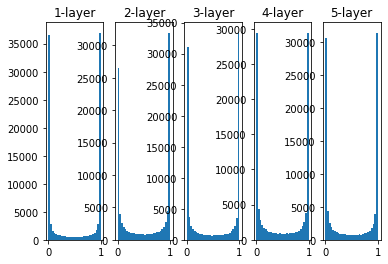

In [12]:
for i,a in activations.items():
  plt.subplot(1, len(activations), i+1)
  plt.title(str(i+1) + "-layer")
  plt.hist(a.flatten(), 30, range = (0,1))

plt.show()

- 각 층의 활성화값들이 0과 1에 치우쳐 분포되어 있다. 
- 시그모이드 함수는 출력이 0과 1에 가까우면 미분이 0에 근접해진다.
- 그래서 데이터가 0과 1에 치우쳐져 있으면 역전파의 기울기 값이 점점 작아지다가 사라져 버린다. 
- 이것이 기울기 소실 문제이다!!! 

---

## 가중치의 표준편자를 0.01로 한다면? 

In [13]:
x = np.random.randn(1000,100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
  if i != 0 :
    x = activations[i-1]
  
  w = np.random.randn(node_num, node_num) * 0.01
  a = np.dot(x,w)
  z = sigmoid(a)
  activations[i] = z

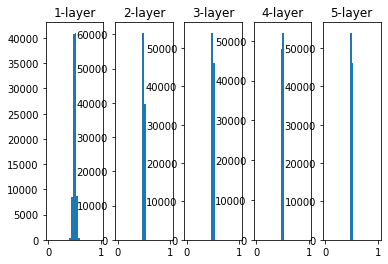

In [14]:
for i,a in activations.items():
  plt.subplot(1, len(activations), i+1)
  plt.title(str(i+1) + "-layer")
  plt.hist(a.flatten(), 30, range = (0,1))

plt.show()

- 0과 1에 치우치지 않아서 기울기 소실이 일어나지 않지만, 활성화 값들이 0.5에 치우지는 문제가 발생한다. 
- 다수의 뉴런이 거의 같은 값을 출력하고 있어서 뉴런을 여러개 둔 의미가 사라진다. 
- 표현력을 제한된다. 
- 층과 층 사이에 적당하게 다양한 데이터가 흘러야 신경망 학습이 효율적으로 이뤄진다! 

--- 

## Xavier 초깃값
- 앞 계층의 노드가 n개라면 표준편차가 $\frac{1}{\sqrt h}$ 인 분포를 사용한다. 

In [15]:
x = np.random.randn(1000,100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
  if i != 0 :
    x = activations[i-1]
  
  w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
  a = np.dot(x,w)
  z = sigmoid(a)
  activations[i] = z

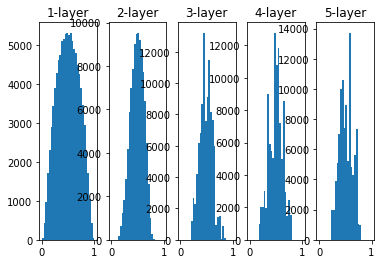

In [16]:
for i,a in activations.items():
  plt.subplot(1, len(activations), i+1)
  plt.title(str(i+1) + "-layer")
  plt.hist(a.flatten(), 30, range = (0,1))

plt.show()

## ReLU를 사용할 때의 가중치 초기값 
- He 초깃값

- He 초깃값은 앞 계층 노드가 n개 일때 표준편차가 $\sqrt\frac{2}{n}$인 정규분포를 사용한다. 
- 음의 영역이 0이라서 더 넓게 분포시키기위해 2배의 계수가 필요하다. 

In [19]:
def relu(x):
  return np.maximum(0,x)

### 표준편차가 0.01인 정규분포를 가중치 초기값으로 사용한 경우 

In [30]:
x = np.random.randn(100,100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
  if i != 0 :
    x = activations[i-1]
  
  w = np.random.randn(node_num, node_num) * 0.01
  a = np.dot(x,w)
  z = relu(a)
  activations[i] = z

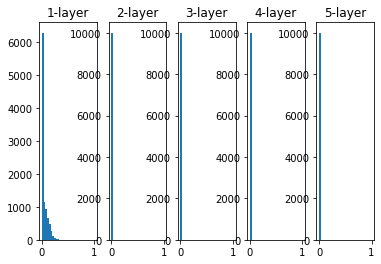

In [31]:
for i,a in activations.items():
  plt.subplot(1, len(activations), i+1)
  plt.title(str(i+1) + "-layer")
  plt.hist(a.flatten(), 30, range = (0,1))

plt.show()

### Xavier 초깃값을 사용한 경우 

In [32]:
x = np.random.randn(100,100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
  if i != 0 :
    x = activations[i-1]
  
  w = np.random.randn(node_num, node_num)/ np.sqrt(node_num)
  a = np.dot(x,w)
  z = relu(a)
  activations[i] = z

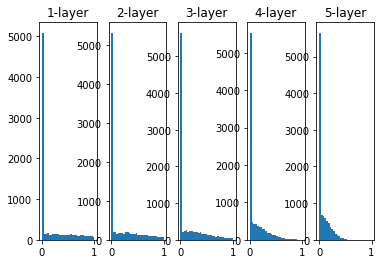

In [33]:
for i,a in activations.items():
  plt.subplot(1, len(activations), i+1)
  plt.title(str(i+1) + "-layer")
  plt.hist(a.flatten(), 30, range = (0,1))

plt.show()

### He 초깃값을 사용한 경우 

In [36]:
x = np.random.randn(100,100)
node_num = 100
hidden_layer_size = 5
activations = {}

for i in range(hidden_layer_size):
  if i != 0 :
    x = activations[i-1]
  
  w = np.random.randn(node_num, node_num) * np.sqrt(2 / node_num)
  a = np.dot(x,w)
  z = relu(a)
  activations[i] = z

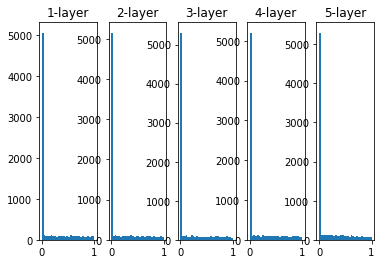

In [37]:
for i,a in activations.items():
  plt.subplot(1, len(activations), i+1)
  plt.title(str(i+1) + "-layer")
  plt.hist(a.flatten(), 30, range = (0,1))

plt.show()

- He 초깃값은 모든 층에서 균일하게 분포되어졌다. 
- 층이 깊어져도 분포가 균일하게 유지되기에 역전파 때도 적절한 값이 나올 것이다!

## 배치 정규화( Batch Normalization) 

- 강제로 각 층이 활성화를 적당히 퍼트리도록 하는 것 

- 장점 
  - 학습을 빨리 진행할 수 있다. (학습 속도 개선)
  - 초깃값에 크게 의존하지 않는다.
  - 오버피팅 억제

- 데이터의 분포가 평균이 0, 분산이 1이 되도록 정규화를 한다. 
- 활성화 함수 앞이나 뒤에 위치 시키면서 데이터 분포가 덜 치우치게 한다. 

$$\mu_B \Leftarrow \frac{1}{m}\sum_{i=1}^m x_i$$

$$\sigma^2_B \Leftarrow \frac{1}{m}\sum_{i=1}^m (x_i - \mu_B)^2$$

$$\hat x_i \Leftarrow \frac{x_i - \mu_B}{\sqrt{\sigma^2_B+\varepsilon}} $$

- 또한 정규화된 데이터에 확대와 이동변환을 한다. 

$$y_i \Leftarrow \gamma\hat x_i + \beta$$

- $\gamma$가 확대를,  $\beta$가 이동을 시킨다. 
- $\gamma$ = 1,  $\beta$ = 0부터 시작하고 학습하면서 적합한 값으로 조정한다. 



## 바른 학습을 위해 

- 훈련 데이터에 딱 맞게 학습되었을때인 오버피팅이 문제가 된다. 
- 왜 오버피팅이 발생하지? 
  - 매개변수가 많고 자유도가 높은 모델
  - 훈련 데이터가 적다 


### 가중치 감소
  - 가중치 매개변수의 값이 커서 오버피팅이 발생하는 경우가 많다. 
  - 학습과정에서 큰 가중치에 대해서는 큰 페널티를 부과하는 것 
  - 가중치가 $W$일때 가중치 감소는 $\frac{1}{2}\lambda W^2$가 된다. 
  - $\lambda $는 정규화 세기를 조절하는 하이퍼파라메터이다. $\lambda $가 크면 큰 가중치에 대한 페널티가 커진다. 

### 드롭아웃 
- 뉴런을 임의로 삭제하면서 학습하는 것 
- train_flg가 False일때 뉴런의 출력에 삭제한 비율을 곱함으로써 앙상블 학습에서 여러 모델의 평균을 내는 것과 같은 효과를 얻는다. 

In [40]:
class Dropout:
  def __init__(self, dropout_ratio = 0.5):
    self.dropout_ratio = dropout_ratio
    self.mask = None
  
  def forward(self,x,train_flg = True):
    if train_flg : 
      self.mask = np.random.rand(*x.shape) > self.dropout_ratio # 튜플 압축을 풀때 *를 붙인다. 
      return x * self.mask
    else : 
      return x*(1.0 - self.dropout_ratio) # 삭제한 비율을 곱함으로써 앙상블 학습에서 여러 모델의 평균을 내는 것과 같은 효과를 얻는다. 
  
  def backward(self,dout):
    return dout * self.mask


## 하이퍼파라미터 최적화 
- 신경망의 하이퍼파라미터 최적화는 그리드 서치와 같은 규칙적인 탐색보다는 무작위로 샘플링해 탐색하는 편이 더 좋은 결과를 낸다. 
- 하이퍼파라미터의 최적 값이 존재하는 범위를 조금씩 줄여간다는 것이 포인트~~